<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/Quiz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Read a color image from the Internet (i.e., nature.jpg). Display its red,
green and blue component separately.

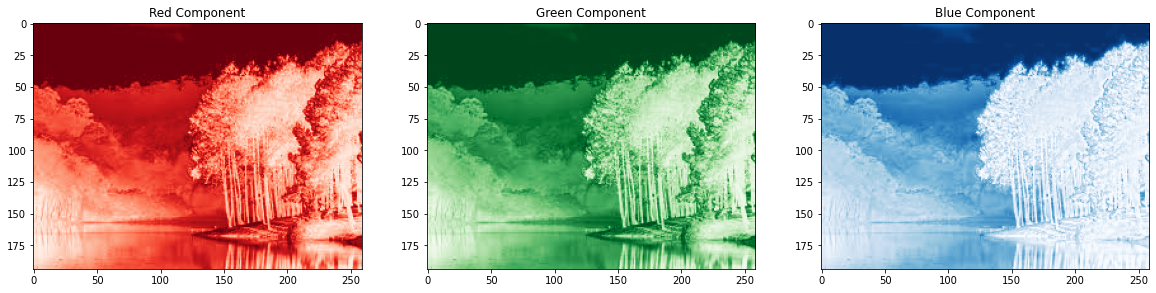

In [4]:
import urllib.request
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Read the image from the internet
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/nature.jfif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())

# Convert the byte array to a numpy array
img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_COLOR)

# Split the color channels
blue_channel, green_channel, red_channel = cv2.split(img)

# Display the red, green and blue component separately using matplotlib
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
axes[0].imshow(red_channel, cmap='Reds')
axes[0].set_title('Red Component')
axes[1].imshow(green_channel, cmap='Greens')
axes[1].set_title('Green Component')
axes[2].imshow(blue_channel, cmap='Blues')
axes[2].set_title('Blue Component')

plt.show()



2. Swap the red and the blue component of the input image to create a
new image (BGR), and save the new image into a new file.

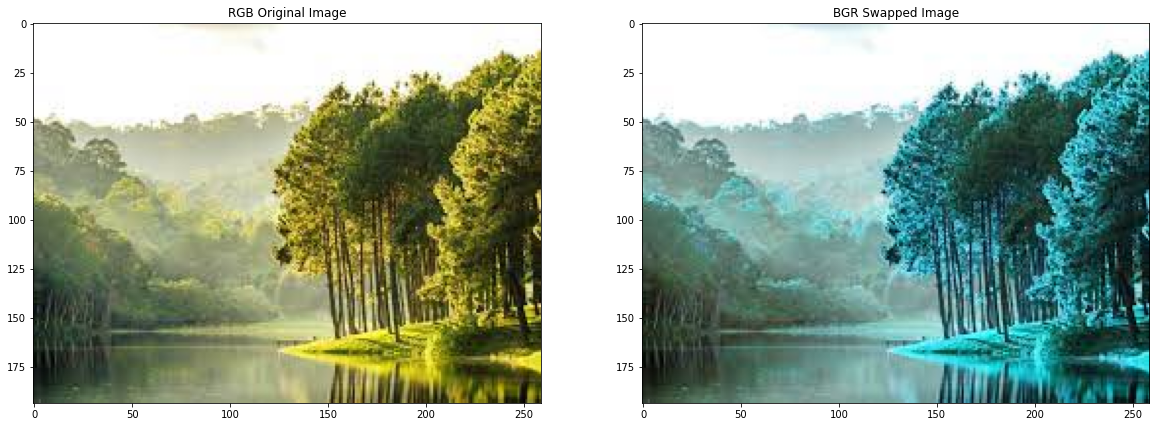

True

In [8]:
import urllib.request
import cv2
import matplotlib.pyplot as plt

# Read the image from the internet
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/nature.jfif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())

# Convert the byte array to a numpy array
img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_COLOR)

# Swap the red and blue channels to create a new image in BGR format
new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

# Display the original and the new images side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('RGB Original Image')
axs[1].imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('BGR Swapped Image')
plt.show()

# Save the new image to a file
cv2.imwrite('BGR_new_image.jpg', new_img)


3. Try to make the image brighter or darker using add a constant or
gamma correction. Values are optional.

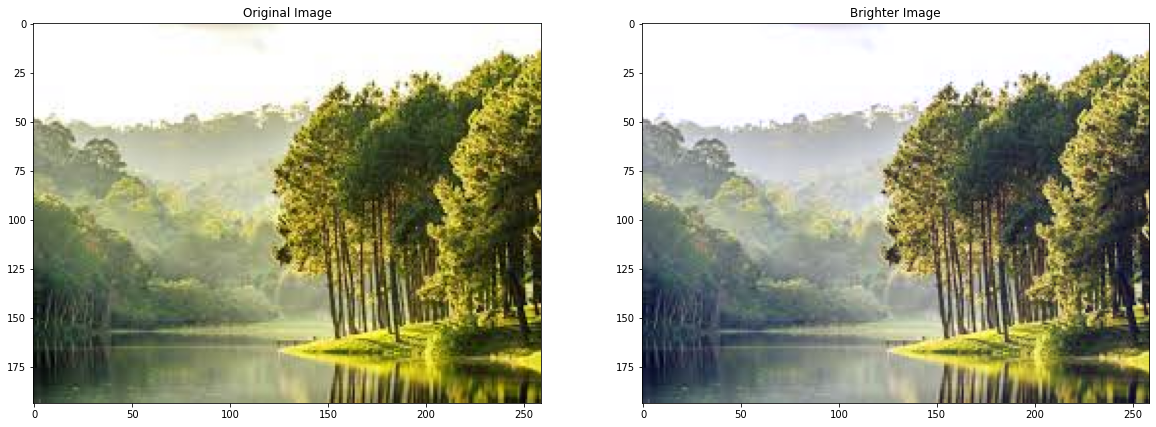

In [17]:
import urllib.request
import cv2
import matplotlib.pyplot as plt

# Read the image from the internet
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/nature.jfif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())

# Convert the byte array to a numpy array
img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_COLOR)

# Add a constant value of 30 to each pixel value to make the image brighter
bright_img = cv2.add(img, 30)

# Display the original and the new images side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Brighter Image')
plt.show()



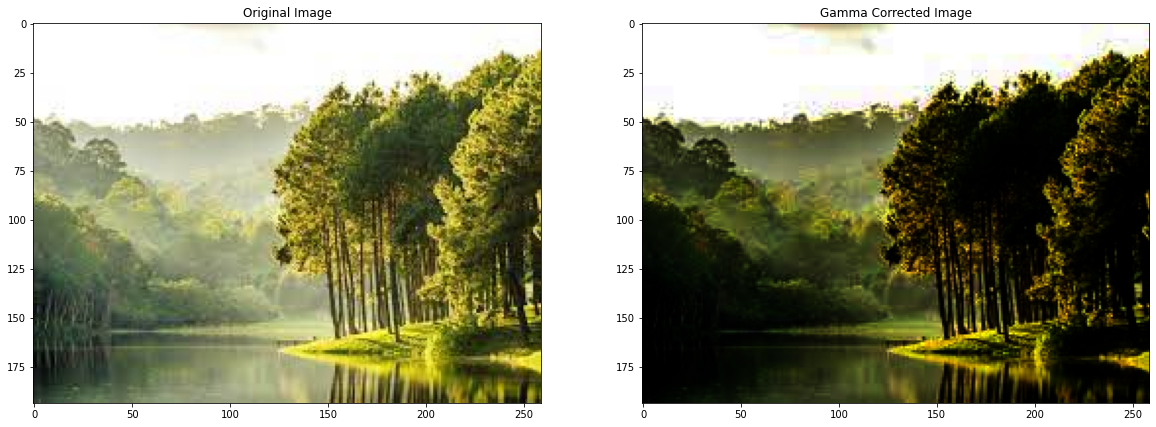

In [18]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image from the internet
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/nature.jfif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())

# Convert the byte array to a numpy array
img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_COLOR)

# Apply gamma correction with a gamma value of 0.3 to make the image darker
gamma = 0.3
inv_gamma = 1.0 / gamma
table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
gamma_img = cv2.LUT(img, table)

# Display the original and the new images side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[1].imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB))
axs[1].set_title('Gamma Corrected Image')
plt.show()



4. Display the image and its histogram in color and grayscale.

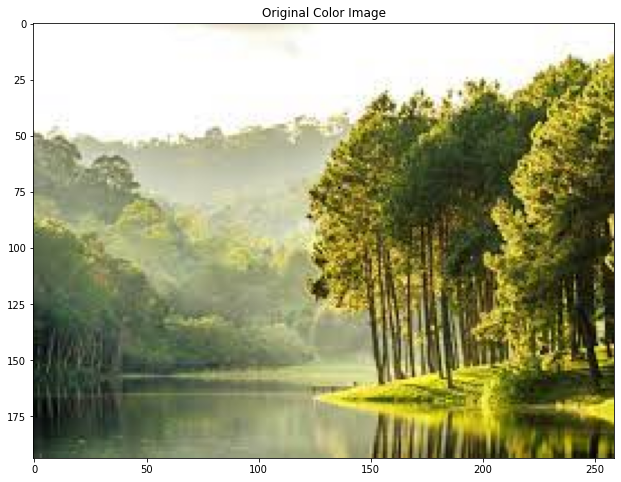

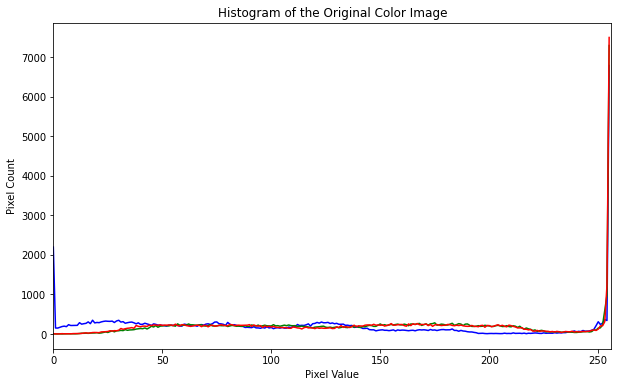

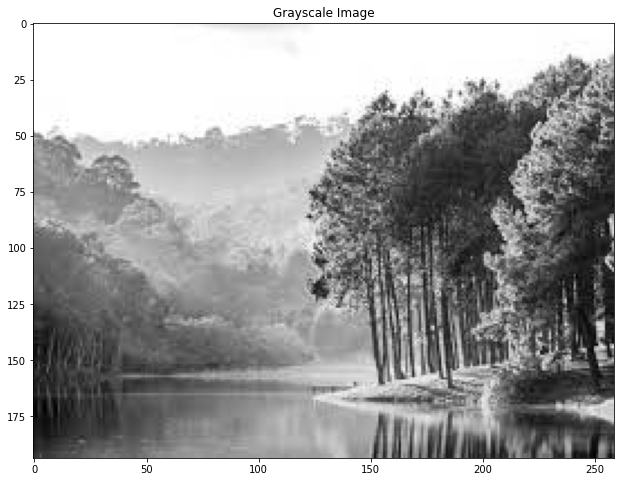

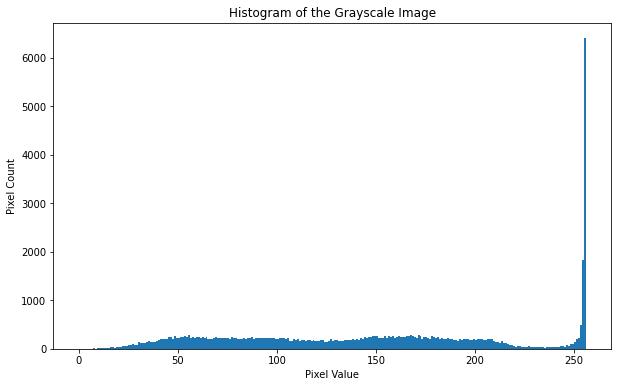

In [31]:
import urllib.request
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Load the image from the internet
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/nature.jfif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())
#img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img_array = np.asarray(bytearray(urllib.request.urlopen(url).read()), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)


# Display the original color image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.show()

# Display the histogram of the original color image
colors = ('b', 'g', 'r')
plt.figure(figsize=(10, 6))
for i, col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Histogram of the Original Color Image')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')
plt.show()

# Convert the color image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_img, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Display the histogram of the grayscale image
plt.figure(figsize=(10, 6))
plt.title('Histogram of the Grayscale Image')
plt.xlabel('Pixel Value')
plt.ylabel('Pixel Count')
plt.hist(gray_img.ravel(), 256, [0, 256], rwidth=20)
plt.show()



5. With grayscale image, do three different actions:
- flip left to right
- rotate clockwise 180 degrees
- crop ½ central of the image

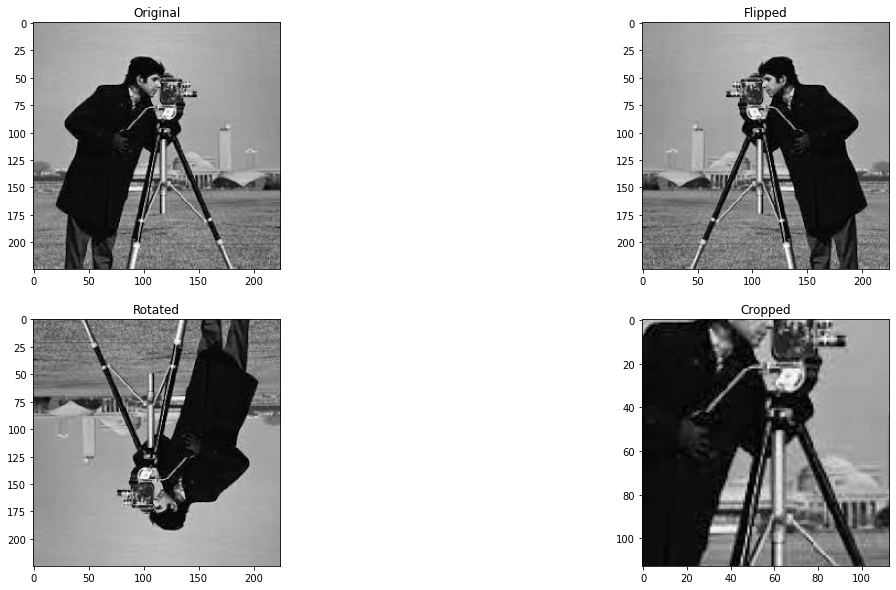

In [35]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/cameraman.tif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())
img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_GRAYSCALE)

# Flip the image left to right
flipped = cv2.flip(img, 1)

# Rotate the image 180 degrees clockwise
rotated = cv2.rotate(img, cv2.ROTATE_180)

# Crop the central 1/2 of the image
height, width = img.shape
crop_height = height // 4
crop_width = width // 4
cropped = img[crop_height:height-crop_height, crop_width:width-crop_width]

# Display the images
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(flipped, cmap='gray')
plt.title('Flipped')

plt.subplot(2, 2, 3)
plt.imshow(rotated, cmap='gray')
plt.title('Rotated')

plt.subplot(2, 2, 4)
plt.imshow(cropped, cmap='gray')
plt.title('Cropped')

plt.show()


6. Quantize the grayscale using 2 bits, 4 bits, 6 bits and 8 bits. Visualize
the effect of the operations.

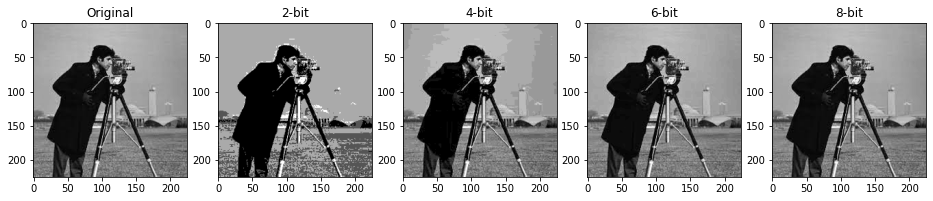

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/cameraman.tif'
with urllib.request.urlopen(url) as url_response:
    img_array = bytearray(url_response.read())
img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_GRAYSCALE)

# Define the quantization levels
quant_levels = [2, 4, 6, 8]

# Quantize the image and display the result
fig, axs = plt.subplots(1, len(quant_levels) + 1, figsize=(16, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original')
for i, n in enumerate(quant_levels):
    levels = 2 ** n
    quant_img = np.floor_divide(img, 256 // levels) * (256 // levels)
    axs[i+1].imshow(quant_img, cmap='gray')
    axs[i+1].set_title(f'{n}-bit')
plt.show()


7. Perform histogram equalization (global and local) for grayscale and
color images. Display the original and equalized ones.

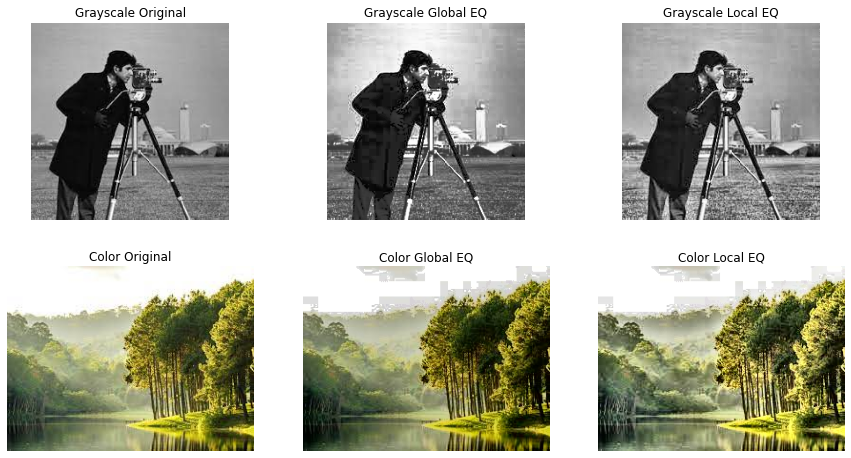

In [57]:
import cv2
import urllib.request
import numpy as np
from matplotlib import pyplot as plt

# Load the grayscale image
gray_url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/cameraman.tif'
with urllib.request.urlopen(gray_url) as url_response:
    img_array = bytearray(url_response.read())
gray_img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_GRAYSCALE)

# Perform global histogram equalization on the grayscale image
gray_global_eq = cv2.equalizeHist(gray_img)

# Perform local histogram equalization on the grayscale image
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
gray_local_eq = clahe.apply(gray_img)

# Load the color image
color_url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/nature.jfif'
with urllib.request.urlopen(color_url) as url_response:
    img_array = bytearray(url_response.read())
color_img = cv2.imdecode(np.asarray(img_array), cv2.IMREAD_COLOR)

# Convert the color image to YUV color space
color_yuv = cv2.cvtColor(color_img, cv2.COLOR_BGR2YUV)

# Perform global histogram equalization on the Y channel of the color image in YUV color space
color_yuv[:,:,0] = cv2.equalizeHist(color_yuv[:,:,0])

# Convert the color image back to BGR color space
color_global_eq = cv2.cvtColor(color_yuv, cv2.COLOR_YUV2BGR)

# Perform local histogram equalization on the Y channel of the color image in YUV color space
color_yuv[:,:,0] = clahe.apply(color_yuv[:,:,0])

# Convert the color image back to BGR color space
color_local_eq = cv2.cvtColor(color_yuv, cv2.COLOR_YUV2BGR)

# Display the original and equalized images
fig, axes = plt.subplots(2, 3, figsize=(15,8))
titles = ['Grayscale Original', 'Grayscale Global EQ', 'Grayscale Local EQ', 
          'Color Original', 'Color Global EQ', 'Color Local EQ']

images = [gray_img, gray_global_eq, gray_local_eq, color_img, color_global_eq, color_local_eq]

for i, ax in enumerate(axes.flatten()):
    ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    ax.set_title(titles[i])
    ax.axis('off')

#axes[0][0].imshow(gray_img, cmap='gray')
#axes[0][1].imshow(gray_global_eq, cmap='gray')
#axes[0][2].imshow(gray_local_eq, cmap='gray')
#axes[1][0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
#axes[1][1].imshow(cv2.cvtColor(color_global_eq, cv2.COLOR_BGR2RGB))
#axes[1][2].imshow(cv2.cvtColor(color_local_eq, cv2.COLOR_BGR2RGB))
plt.show()
